In [1]:
import glob
futureList = glob.glob('C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet/*.parquet')
print(futureList)

import pandas as pd

df_fut = pd.read_parquet(futureList[0])

for future_file in futureList[1:]:
    df_future = pd.read_parquet(future_file)
    
    df_fut = pd.concat([df_fut, df_future], axis=0, ignore_index=True)


# 檢查結果
# print(df_opt.info())
print(df_fut.columns)


df_opt = pd.read_parquet("C:/my_file/0_research/20250908_FutureStrategy/option_data/processed_parquet/opt_all.parquet")
df_opt = df_opt.drop(columns=['漲跌價', '漲跌%', 'Unnamed: 20', '契約到期日', 'Unnamed: 21'])
print(df_opt.columns)

['C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2001_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2002_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2003_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2004_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2005_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2006_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2007_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2008_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2009_fut.parquet', 'C:/my_file/0_research/20250908_FutureStrategy/future_data/processed_parquet\\2010_fut.parquet', 'C:/my_file/0_research/202509

In [2]:
from utils import clean_futures_data, clean_options_data

df_fut_clean = clean_futures_data(df_fut)
df_opt_clean = clean_options_data(df_opt)

# 簡單檢查一下結果
print("\n[檢查] 期貨資料前 3 筆:")
print(df_fut_clean[['交易日期', '契約', '到期月份(週別)', '開盤價', '收盤價']].head(3))

print("\n[檢查] 選擇權資料前 3 筆:")
print(df_opt_clean[['交易日期', '到期月份(週別)', '履約價', '買賣權', '收盤價']].head(3))

--- 開始清洗期貨資料 (Futures) ---
>> 已排除價差單: 36798 筆
>> 期貨資料清洗完成，共 44990 筆。
--- 開始清洗選擇權資料 (Options) ---
>> 已過濾盤後資料: 2317932 筆
>> 選擇權資料清洗完成，共 1529628 筆。

[檢查] 期貨資料前 3 筆:
        交易日期  契約 到期月份(週別)     開盤價     收盤價
0 2001-01-02  TX   200101  4702.0  4892.0
1 2001-01-02  TX   200102  4750.0  4909.0
2 2001-01-02  TX   200103  4724.0  4950.0

[檢查] 選擇權資料前 3 筆:
        交易日期 到期月份(週別)     履約價 買賣權  收盤價
0 2017-01-03   201701  7500.0  買權  0.0
1 2017-01-03   201701  7500.0  賣權  0.1
2 2017-01-03   201701  7600.0  買權  0.0


In [23]:
%load_ext autoreload
%autoreload 2

from utils import *
from EnhancedWheelStrategy2 import EnhancedWheelStrategy


# 1. 準備策略
strategy = EnhancedWheelStrategy(
    leverage=5.0, 
    target_delta=0.2,
    stop_loss_delta=0.6
)

# 2. 執行回測 (傳入清洗好的 DataFrame)
# df_opt_clean, df_fut_clean 需預先準備好
executor = BacktestExecutor(strategy, '2015-01-01', '2022-12-31', df_opt_clean, df_fut_clean, balance=150_000)
df_result = executor.run()

# 3. 查看結果
# print(df_result[['entry_date', 'exit_date', 'mode', 'qty', 'pnl', 'balance']].tail())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Executor Start | Balance: 150000 ---
--- 初始化市場資料生成器 (2015-01-01 00:00:00 to 2022-12-31 00:00:00) ---
>> 預計執行交易日數: 1958 天

=== 2017-01-18 換倉日 / 結算日 ===
>> 預計結算合約: 201701 -> 預計開倉合約: 201702
>> [開倉選擇] PUT | 合約: 201702 | 履約價: 9000.0 | Delta: 0.17
>> [成交 OPEN] 2017-01-18 201702 | 口數: 1 | 收權利金: 1650


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-02-03 觸發停利! 進場: 33.0, 現價: 4.5, 目標: 6.599999999999999
>> [成交 CLOSE] 2017-02-03 PnL: 1425 | Detail: ['put 9000.0 (33.0->4.5)']

=== 2017-02-15 換倉日 / 結算日 ===
>> 預計結算合約: 201702 -> 預計開倉合約: 201703
>> [開倉選擇] PUT | 合約: 201703 | 履約價: 9500.0 | Delta: 0.20
>> [成交 OPEN] 2017-02-15 201703 | 口數: 1 | 收權利金: 1675


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-03-07 觸發停利! 進場: 33.5, 現價: 6.3, 目標: 6.699999999999998
>> [成交 CLOSE] 2017-03-07 PnL: 1360 | Detail: ['put 9500.0 (33.5->6.3)']

=== 2017-03-15 換倉日 / 結算日 ===
>> 預計結算合約: 201703 -> 預計開倉合約: 201704


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [開倉選擇] PUT | 合約: 201704 | 履約價: 9500.0 | Delta: 0.23
>> [成交 OPEN] 2017-03-15 201704 | 口數: 1 | 收權利金: 2425
>> [信號] 2017-03-21 觸發停利! 進場: 48.5, 現價: 9.3, 目標: 9.699999999999998
>> [成交 CLOSE] 2017-03-21 PnL: 1960 | Detail: ['put 9500.0 (48.5->9.3)']

=== 2017-04-19 換倉日 / 結算日 ===
>> 預計結算合約: 201704 -> 預計開倉合約: 201705
>> [開倉選擇] PUT | 合約: 201705 | 履約價: 9400.0 | Delta: 0.23
>> [成交 OPEN] 2017-04-19 201705 | 口數: 1 | 收權利金: 3000
>> [信號] 2017-04-25 觸發停利! 進場: 60.0, 現價: 11.0, 目標: 11.999999999999996
>> [成交 CLOSE] 2017-04-25 PnL: 2450 | Detail: ['put 9400.0 (60.0->11.0)']


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()



=== 2017-05-17 換倉日 / 結算日 ===
>> 預計結算合約: 201705 -> 預計開倉合約: 201706
>> [開倉選擇] PUT | 合約: 201706 | 履約價: 9700.0 | Delta: 0.18
>> [成交 OPEN] 2017-05-17 201706 | 口數: 1 | 收權利金: 1850


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-06-02 觸發停利! 進場: 37.0, 現價: 5.2, 目標: 7.399999999999999
>> [成交 CLOSE] 2017-06-02 PnL: 1590 | Detail: ['put 9700.0 (37.0->5.2)']

=== 2017-06-21 換倉日 / 結算日 ===
>> 預計結算合約: 201706 -> 預計開倉合約: 201707
>> [開倉選擇] PUT | 合約: 201707 | 履約價: 10000.0 | Delta: 0.20
>> [成交 OPEN] 2017-06-21 201707 | 口數: 1 | 收權利金: 2200


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-07-11 觸發停利! 進場: 44.0, 現價: 4.1, 目標: 8.799999999999997
>> [成交 CLOSE] 2017-07-11 PnL: 1995 | Detail: ['put 10000.0 (44.0->4.1)']

=== 2017-07-19 換倉日 / 結算日 ===
>> 預計結算合約: 201707 -> 預計開倉合約: 201708
>> [開倉選擇] PUT | 合約: 201708 | 履約價: 10200.0 | Delta: 0.23
>> [成交 OPEN] 2017-07-19 201708 | 口數: 1 | 收權利金: 2500


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-08-07 觸發停利! 進場: 50.0, 現價: 6.6, 目標: 9.999999999999998
>> [成交 CLOSE] 2017-08-07 PnL: 2170 | Detail: ['put 10200.0 (50.0->6.6)']

=== 2017-08-16 換倉日 / 結算日 ===
>> 預計結算合約: 201708 -> 預計開倉合約: 201709
>> [開倉選擇] PUT | 合約: 201709 | 履約價: 9900.0 | Delta: 0.19
>> [成交 OPEN] 2017-08-16 201709 | 口數: 1 | 收權利金: 2600


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-08-28 觸發停利! 進場: 52.0, 現價: 10.0, 目標: 10.399999999999999
>> [成交 CLOSE] 2017-08-28 PnL: 2100 | Detail: ['put 9900.0 (52.0->10.0)']

=== 2017-09-20 換倉日 / 結算日 ===
>> 預計結算合約: 201709 -> 預計開倉合約: 201710
>> [開倉選擇] PUT | 合約: 201710 | 履約價: 10300.0 | Delta: 0.23
>> [成交 OPEN] 2017-09-20 201710 | 口數: 1 | 收權利金: 2650


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-10-06 觸發停利! 進場: 53.0, 現價: 9.9, 目標: 10.599999999999998
>> [成交 CLOSE] 2017-10-06 PnL: 2155 | Detail: ['put 10300.0 (53.0->9.9)']

=== 2017-10-18 換倉日 / 結算日 ===
>> 預計結算合約: 201710 -> 預計開倉合約: 201711
>> [開倉選擇] PUT | 合約: 201711 | 履約價: 10400.0 | Delta: 0.17
>> [成交 OPEN] 2017-10-18 201711 | 口數: 1 | 收權利金: 1600


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2017-11-03 觸發停利! 進場: 32.0, 現價: 5.4, 目標: 6.399999999999999
>> [成交 CLOSE] 2017-11-03 PnL: 1330 | Detail: ['put 10400.0 (32.0->5.4)']

=== 2017-11-15 換倉日 / 結算日 ===
>> 預計結算合約: 201711 -> 預計開倉合約: 201712
>> [開倉選擇] PUT | 合約: 201712 | 履約價: 10300.0 | Delta: 0.17
>> [成交 OPEN] 2017-11-15 201712 | 口數: 1 | 收權利金: 2000
>> [信號] 2017-11-21 觸發停利! 進場: 40.0, 現價: 7.8, 目標: 7.999999999999998
>> [成交 CLOSE] 2017-11-21 PnL: 1610 | Detail: ['put 10300.0 (40.0->7.8)']


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()



=== 2017-12-20 換倉日 / 結算日 ===
>> 預計結算合約: 201712 -> 預計開倉合約: 201801
>> [開倉選擇] PUT | 合約: 201801 | 履約價: 10200.0 | Delta: 0.19
>> [成交 OPEN] 2017-12-20 201801 | 口數: 1 | 收權利金: 1650


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-01-02 觸發停利! 進場: 33.0, 現價: 6.4, 目標: 6.599999999999999
>> [成交 CLOSE] 2018-01-02 PnL: 1330 | Detail: ['put 10200.0 (33.0->6.4)']

=== 2018-01-17 換倉日 / 結算日 ===
>> 預計結算合約: 201801 -> 預計開倉合約: 201802
>> [開倉選擇] PUT | 合約: 201802 | 履約價: 10700.0 | Delta: 0.20
>> [成交 OPEN] 2018-01-17 201802 | 口數: 1 | 收權利金: 1925


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-02-08 觸發 Delta 止損! 當前 Delta 0.69 > 閾值 0.6
>> [成交 CLOSE] 2018-02-08 PnL: -9825 | Detail: ['put 10700.0 (38.5->235.0)']

=== 2018-02-21 換倉日 / 結算日 ===
>> 預計結算合約: 201802 -> 預計開倉合約: 201803
>> [開倉選擇] PUT | 合約: 201803 | 履約價: 10100.0 | Delta: 0.18
>> [成交 OPEN] 2018-02-21 201803 | 口數: 1 | 收權利金: 3200


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-03-09 觸發停利! 進場: 64.0, 現價: 11.0, 目標: 12.799999999999997
>> [成交 CLOSE] 2018-03-09 PnL: 2650 | Detail: ['put 10100.0 (64.0->11.0)']

=== 2018-03-21 換倉日 / 結算日 ===
>> 預計結算合約: 201803 -> 預計開倉合約: 201804
>> [開倉選擇] PUT | 合約: 201804 | 履約價: 10600.0 | Delta: 0.22
>> [成交 OPEN] 2018-03-21 201804 | 口數: 1 | 收權利金: 3700


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-04-11 觸發停利! 進場: 74.0, 現價: 9.7, 目標: 14.799999999999997
>> [成交 CLOSE] 2018-04-11 PnL: 3215 | Detail: ['put 10600.0 (74.0->9.7)']

=== 2018-04-18 換倉日 / 結算日 ===
>> 預計結算合約: 201804 -> 預計開倉合約: 201805


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [開倉選擇] PUT | 合約: 201805 | 履約價: 10500.0 | Delta: 0.22
>> [成交 OPEN] 2018-04-18 201805 | 口數: 1 | 收權利金: 3000
>> [信號] 2018-05-10 觸發停利! 進場: 60.0, 現價: 7.1, 目標: 11.999999999999996
>> [成交 CLOSE] 2018-05-10 PnL: 2645 | Detail: ['put 10500.0 (60.0->7.1)']

=== 2018-05-16 換倉日 / 結算日 ===
>> 預計結算合約: 201805 -> 預計開倉合約: 201806
>> [開倉選擇] PUT | 合約: 201806 | 履約價: 10500.0 | Delta: 0.20
>> [成交 OPEN] 2018-05-16 201806 | 口數: 1 | 收權利金: 2475


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-06-05 觸發停利! 進場: 49.5, 現價: 9.5, 目標: 9.899999999999999
>> [成交 CLOSE] 2018-06-05 PnL: 2000 | Detail: ['put 10500.0 (49.5->9.5)']

=== 2018-06-20 換倉日 / 結算日 ===
>> 預計結算合約: 201806 -> 預計開倉合約: 201807
>> [開倉選擇] PUT | 合約: 201807 | 履約價: 10400.0 | Delta: 0.19
>> [成交 OPEN] 2018-06-20 201807 | 口數: 1 | 收權利金: 3150


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-07-10 觸發停利! 進場: 63.0, 現價: 11.5, 目標: 12.599999999999998
>> [成交 CLOSE] 2018-07-10 PnL: 2575 | Detail: ['put 10400.0 (63.0->11.5)']

=== 2018-07-18 換倉日 / 結算日 ===
>> 預計結算合約: 201807 -> 預計開倉合約: 201808
>> [開倉選擇] PUT | 合約: 201808 | 履約價: 10400.0 | Delta: 0.18
>> [成交 OPEN] 2018-07-18 201808 | 口數: 1 | 收權利金: 2600


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-07-31 觸發停利! 進場: 52.0, 現價: 8.2, 目標: 10.399999999999999
>> [成交 CLOSE] 2018-07-31 PnL: 2190 | Detail: ['put 10400.0 (52.0->8.2)']

=== 2018-08-15 換倉日 / 結算日 ===
>> 預計結算合約: 201808 -> 預計開倉合約: 201809
>> [開倉選擇] PUT | 合約: 201809 | 履約價: 10300.0 | Delta: 0.19
>> [成交 OPEN] 2018-08-15 201809 | 口數: 1 | 收權利金: 3450


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-08-28 觸發停利! 進場: 69.0, 現價: 10.5, 目標: 13.799999999999997
>> [成交 CLOSE] 2018-08-28 PnL: 2925 | Detail: ['put 10300.0 (69.0->10.5)']

=== 2018-09-19 換倉日 / 結算日 ===
>> 預計結算合約: 201809 -> 預計開倉合約: 201810
>> [開倉選擇] PUT | 合約: 201810 | 履約價: 10500.0 | Delta: 0.18
>> [成交 OPEN] 2018-09-19 201810 | 口數: 1 | 收權利金: 1950


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-10-11 觸發 Gamma 避險! 剩餘 4.1 天且 Delta 0.60 偏高
>> [成交 CLOSE] 2018-10-11 PnL: -41300 | Detail: ['put 10500.0 (39.0->865.0)']

=== 2018-10-17 換倉日 / 結算日 ===
>> 預計結算合約: 201810 -> 預計開倉合約: 201811
>> [開倉選擇] PUT | 合約: 201811 | 履約價: 9500.0 | Delta: 0.21
>> [成交 OPEN] 2018-10-17 201811 | 口數: 1 | 收權利金: 5000


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-11-15 觸發停利! 進場: 100.0, 現價: 19.0, 目標: 19.999999999999996
>> [成交 CLOSE] 2018-11-15 PnL: 4050 | Detail: ['put 9500.0 (100.0->19.0)']

=== 2018-11-21 換倉日 / 結算日 ===
>> 預計結算合約: 201811 -> 預計開倉合約: 201812
>> [開倉選擇] PUT | 合約: 201812 | 履約價: 9200.0 | Delta: 0.19
>> [成交 OPEN] 2018-11-21 201812 | 口數: 1 | 收權利金: 3200


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2018-12-03 觸發停利! 進場: 64.0, 現價: 8.7, 目標: 12.799999999999997
>> [成交 CLOSE] 2018-12-03 PnL: 2765 | Detail: ['put 9200.0 (64.0->8.7)']

=== 2018-12-19 換倉日 / 結算日 ===
>> 預計結算合約: 201812 -> 預計開倉合約: 201901
>> [開倉選擇] PUT | 合約: 201901 | 履約價: 9300.0 | Delta: 0.20
>> [成交 OPEN] 2018-12-19 201901 | 口數: 1 | 收權利金: 3450


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2019-01-09 觸發停利! 進場: 69.0, 現價: 9.5, 目標: 13.799999999999997
>> [成交 CLOSE] 2019-01-09 PnL: 2975 | Detail: ['put 9300.0 (69.0->9.5)']

=== 2019-01-16 換倉日 / 結算日 ===
>> 預計結算合約: 201901 -> 預計開倉合約: 201902


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [開倉選擇] PUT | 合約: 201902 | 履約價: 9300.0 | Delta: 0.18
>> [成交 OPEN] 2019-01-16 201902 | 口數: 1 | 收權利金: 2950
>> [信號] 2019-02-11 觸發停利! 進場: 59.0, 現價: 3.5, 目標: 11.799999999999997
>> [成交 CLOSE] 2019-02-11 PnL: 2775 | Detail: ['put 9300.0 (59.0->3.5)']

=== 2019-02-20 換倉日 / 結算日 ===
>> 預計結算合約: 201902 -> 預計開倉合約: 201903
>> [開倉選擇] PUT | 合約: 201903 | 履約價: 9900.0 | Delta: 0.21
>> [成交 OPEN] 2019-02-20 201903 | 口數: 1 | 收權利金: 2150


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2019-03-12 觸發停利! 進場: 43.0, 現價: 5.0, 目標: 8.599999999999998
>> [成交 CLOSE] 2019-03-12 PnL: 1900 | Detail: ['put 9900.0 (43.0->5.0)']

=== 2019-03-20 換倉日 / 結算日 ===
>> 預計結算合約: 201903 -> 預計開倉合約: 201904
>> [開倉選擇] PUT | 合約: 201904 | 履約價: 10200.0 | Delta: 0.20
>> [成交 OPEN] 2019-03-20 201904 | 口數: 1 | 收權利金: 2175


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()


>> [信號] 2019-04-08 觸發停利! 進場: 43.5, 現價: 6.2, 目標: 8.699999999999998
>> [成交 CLOSE] 2019-04-08 PnL: 1865 | Detail: ['put 10200.0 (43.5->6.2)']

=== 2019-04-17 換倉日 / 結算日 ===
>> 預計結算合約: 201904 -> 預計開倉合約: 201905
>> [開倉選擇] PUT | 合約: 201905 | 履約價: 10600.0 | Delta: 0.17
>> [成交 OPEN] 2019-04-17 201905 | 口數: 1 | 收權利金: 1900


c:\my_file\0_research\20250908_FutureStrategy\Future-Option-Trader\EnhancedWheelStrategy2.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_candidates['diff'] = (valid_candidates['abs_delta'] - self.target_delta).abs()



=== 2019-05-15 換倉日 / 結算日 ===
>> 預計結算合約: 201905 -> 預計開倉合約: 201906
>> [結算] 舊倉 ITM 被穿價 (S=10539.0, K=10600.0)
>> [模式切換] 進入 CALL 救援模式. 虛擬成本: 10600.0
>> [開倉選擇] CALL (救援) | 合約: 201906 | 履約價: 10600.0 (Cost: 10600.0) | Delta: 0.47
>> [成交 CLOSE] 2019-05-15 PnL: 875 | Detail: ['put 10600.0 (38.0->20.5)']
>> [成交 OPEN] 2019-05-15 201906 | 口數: 1 | 收權利金: 8700
>> [信號] 2019-05-29 觸發停利! 進場: 174.0, 現價: 31.5, 目標: 34.79999999999999
>> [成交 CLOSE] 2019-05-29 PnL: 7125 | Detail: ['call 10600.0 (174.0->31.5)']

=== 2019-06-19 換倉日 / 結算日 ===
>> 預計結算合約: 201906 -> 預計開倉合約: 201907
>> [開倉選擇] CALL (救援) | 合約: 201907 | 履約價: 10600.0 (Cost: 10600.0) | Delta: 0.67
>> [成交 OPEN] 2019-06-19 201907 | 口數: 1 | 收權利金: 6750
>> [信號] 2019-07-01 觸發 Delta 止損! 當前 Delta 0.62 > 閾值 0.6
>> [成交 CLOSE] 2019-07-01 PnL: -4050 | Detail: ['call 10600.0 (135.0->216.0)']

=== 2019-07-17 換倉日 / 結算日 ===
>> 預計結算合約: 201907 -> 預計開倉合約: 201908
>> [放棄] 符合成本的 Call Delta 過小 (0.00)，不交易

=== 2019-08-21 換倉日 / 結算日 ===
>> 預計結算合約: 201908 -> 預計開倉合約: 201909
>> [開倉選

In [24]:
df_result

,entry_date,exit_date,pnl,roi,trade_detail,balance
0,2017-01-18,2017-02-03,1425.0,0.863636,put 9000.0 (33.0->4.5),151425.0
1,2017-02-15,2017-03-07,1360.0,0.811940,put 9500.0 (33.5->6.3),152785.0
2,2017-03-15,2017-03-21,1960.0,0.808247,put 9500.0 (48.5->9.3),154745.0
3,2017-04-19,2017-04-25,2450.0,0.816667,put 9400.0 (60.0->11.0),157195.0
4,2017-05-17,2017-06-02,1590.0,0.859459,put 9700.0 (37.0->5.2),158785.0
5,2017-06-21,2017-07-11,1995.0,0.906818,put 10000.0 (44.0->4.1),160780.0
6,2017-07-19,2017-08-07,2170.0,0.868000,put 10200.0 (50.0->6.6),162950.0
7,2017-08-16,2017-08-28,2100.0,0.807692,put 9900.0 (52.0->10.0),165050.0
8,2017-09-20,2017-10-06,2155.0,0.813208,put 10300.0 (53.0->9.9),167205.0
9,2017-10-18,2017-11-03,1330.0,0.831250,put 10400.0 (32.0->5.4),168535.0


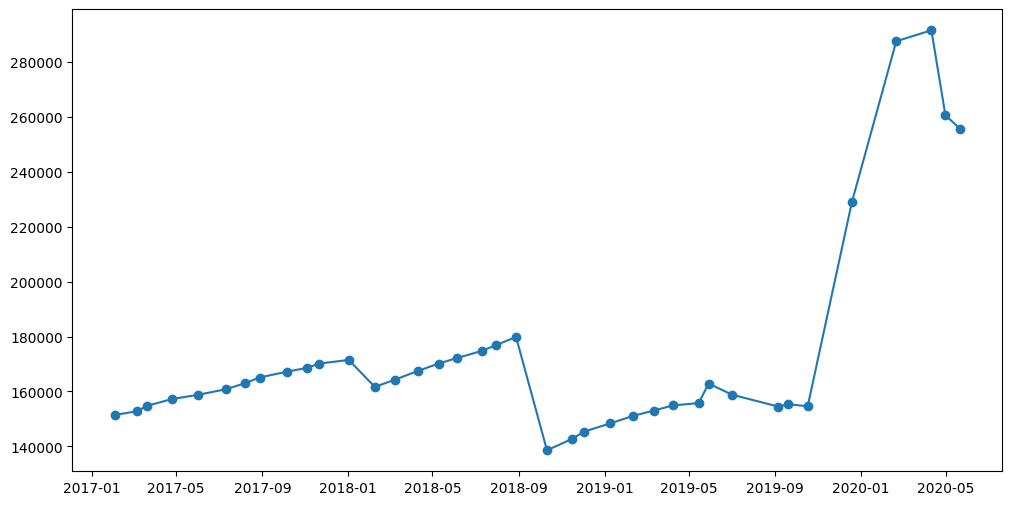

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_result['exit_date'], df_result['balance'], marker='o')